In [1]:
import matplotlib.pyplot as plt
from test_lib.lib import oracle, RotationAdd, encode_number
import numpy as np
from qiskit.circuit.library import QFTGate, grover_operator, MCMTGate, ZGate, HGate
from qiskit import QuantumCircuit
from math import floor, pi
from qiskit_aer import AerSimulator
import qiskit
from qiskit.visualization import plot_histogram

%matplotlib inline

In [2]:
max_values = [64, 128, 256]
set_sizes = np.linspace(1, 100, 100)
qubits = {"64": [], "128": [], "256": []}
gates = {"64": [], "128": [], "256": []}
depths =  {"64": [], "128": [], "256": []}
single_qubits = {"64": [], "128": [], "256": []}
two_qubits = {"64": [], "128": [], "256": []}
single_qubit_gates = ["p", "h", "u3", ]
two_qubit_gates = ["cx", "cp", "swap"]

for val in max_values:
    for size in set_sizes:
        S = [val] * int(size)
        T = val * int(size)
        orcl = oracle(S, T)
        qubits[f"{val}"].append(orcl.num_qubits)
        g = orcl.decompose().count_ops()
        s = 0
        for c in g:
            s += g[c]
        gates[f"{val}"].append(s)
        depths[f"{val}"].append(orcl.depth())


In [3]:
max_values = [64, 128, 256]
set_sizes = np.linspace(1, 100, 100)

orcl = oracle(list(range(20)), max_values[0])

qiskit.transpile(orcl, basis_gates=["h", "cx", "p"]).count_ops()


OrderedDict([('p', 1190), ('cx', 962), ('h', 328)])

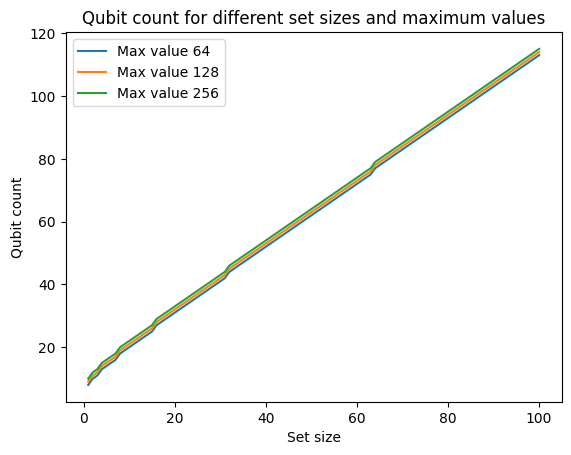

In [4]:
for value in qubits:
    plt.plot(set_sizes, qubits[f"{value}"], label=f"Max value {value}")
    plt.legend()
    plt.title("Qubit count for different set sizes and maximum values")
    plt.xlabel("Set size")
    plt.ylabel("Qubit count")
plt.savefig("qubit_count.png")

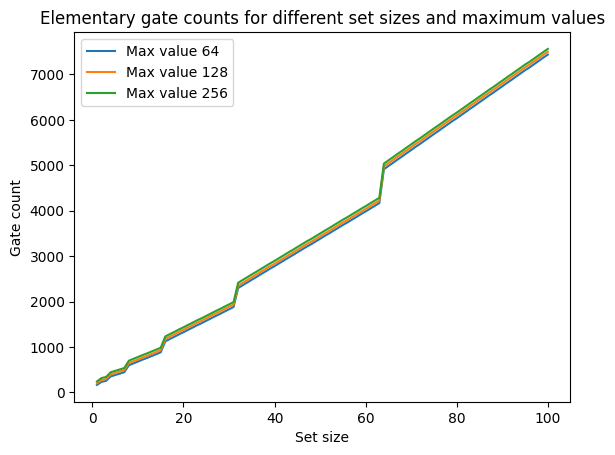

In [29]:
for value in qubits:
    plt.plot(set_sizes, gates[value], label=f"Max value {value}")
    plt.legend()
    plt.title("Elementary gate counts for different set sizes and maximum values")
    plt.xlabel("Set size")
    plt.ylabel("Gate count")
plt.savefig("gate_count_set_size.png")

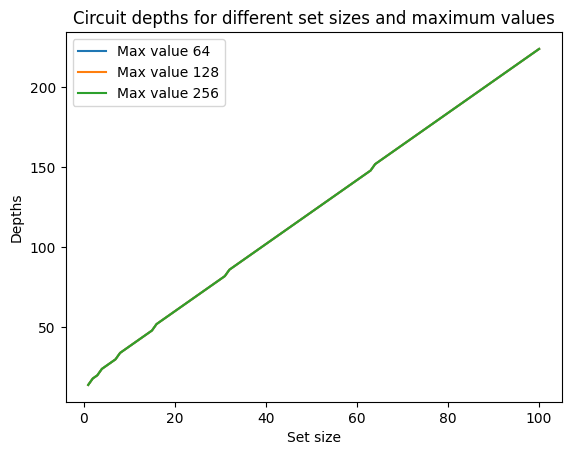

In [32]:
for value in qubits:
    plt.plot(set_sizes, depths[value], label=f"Max value {value}")
    plt.legend()
    plt.title("Circuit depths for different set sizes and maximum values")
    plt.xlabel("Set size")
    plt.ylabel("Depths")
plt.savefig("depth_set_size.png")

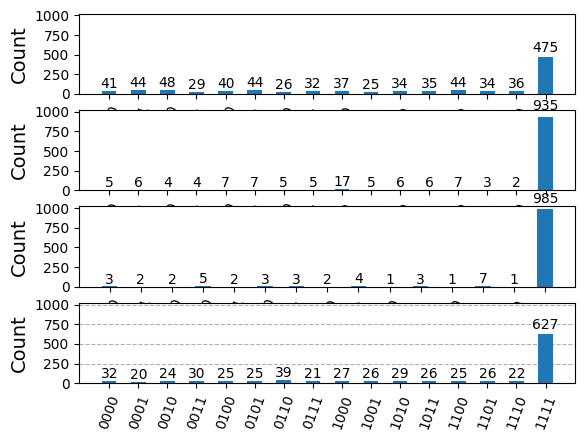

In [28]:
S = [1,2,4,8]
T = 15
num_iter = floor(len(S) * pi / 4)
fig, ax = plt.subplots(num_iter + 1)
for i in range(1, num_iter + 2):    # for position in StatevectorPosition:
    orcl = oracle(S, T)
    qc = QuantumCircuit(orcl.num_qubits, orcl.num_clbits)
    qc.h(list(range(len(S))))

    qc.append(grover_operator(orcl, reflection_qubits=list(range(len(S)))).power(i), list(range(orcl.num_qubits)), list(range(orcl.num_clbits)))

    for j in range(len(S)):
        qc.measure(j, j)

    
    simulator = AerSimulator(method='matrix_product_state')
    simulator.set_max_qubits(qc.num_qubits)
    circ = qiskit.transpile(qc, simulator)
    result = simulator.run(circ).result().get_counts()
    plot_histogram(result, ax=ax[i - 1])
    ax[i - 1].set_ylim(0,1024)

fig.savefig("optimal_iter.png")
    

In [3]:
S = [1,2,5,7]
T = 15
qc = oracle(S,T)
qc.draw(output="mpl", fold=-1).savefig("toy_example_oracle.png")

0 0
0 1
0 2
0 3
1 0
1 1
1 2
0 0
0 1
0 2
0 3
2 0
2 1
0 0
0 1
0 2
0 3
1 0
1 1
1 2
2 0
2 1
0 0
0 1
0 2
0 3
1 0
1 1
1 2
0 0
0 1
0 2
0 3
2 0
2 1
0 0
0 1
0 2
0 3
1 0
1 1
1 2
2 0
2 1


In [5]:
qc = RotationAdd(2, 2)

qc.draw()

AttributeError: 'Gate' object has no attribute 'draw'

In [1]:
from test_lib.lib import oracle
orcl = oracle([3], 0)
orcl.draw(fold=-1)

0 0
0 1
1 0
0 0
0 1
1 0


┌────────┐                 1-Z ┌───┐ 1-Z ┌───┐             ┌───────┐           
     index: ────────┤0       ├──────────────────■──┤ X ├──■──┤ X ├─────────────┤0      ├───────────
            ┌──────┐│        │┌─────────┐┌───┐  │  └─┬─┘  │  └─┬─┘┌───┐┌──────┐│       │┌─────────┐
  target_0: ┤0     ├┤1 R(-3) ├┤0        ├┤ X ├──■────■────■────■──┤ X ├┤0     ├┤1 R(3) ├┤0        ├
            │  Qft ││        ││  qft_dg │├───┤  │    │    │    │  ├───┤│  Qft ││       ││  qft_dg │
  target_1: ┤1     ├┤2       ├┤1        ├┤ X ├──■────■────■────■──┤ X ├┤1     ├┤2      ├┤1        ├
            └──────┘└────────┘└─────────┘└───┘                    └───┘└──────┘└───────┘└─────────┘
target_M: 1/═══════════════════════════════════════════════════════════════════════════════════════